# DATA COLLECTION

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
series = read_csv('acfdata.csv',names=['t','t+1','t+2','t+3','t+4','t+5','t+6','t+7','t+8','t+9','t-1','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9',])
series

,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
0,13,8.0,15.0,4.0,4.0,12.0,11.0,7.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,15.0,4.0,4.0,12.0,11.0,7.0,14.0,12.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,4.0,4.0,12.0,11.0,7.0,14.0,12.0,NaN,NaN,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.0,12.0,11.0,7.0,14.0,12.0,NaN,NaN,NaN,15.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12.0,11.0,7.0,14.0,12.0,NaN,NaN,NaN,NaN,4.0,15.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN
5,12,11.0,7.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,15.0,8.0,13.0,NaN,NaN,NaN,NaN
6,11,7.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4.0,4.0,15.0,8.0,13.0,NaN,NaN,NaN
7,7,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,12.0,4.0,4.0,15.0,8.0,13.0,NaN,NaN
8,14,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.0,12.0,4.0,4.0,15.0,8.0,13.0,NaN
9,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,7.0,11.0,12.0,4.0,4.0,15.0,8.0,13.0


# ACF PLOT

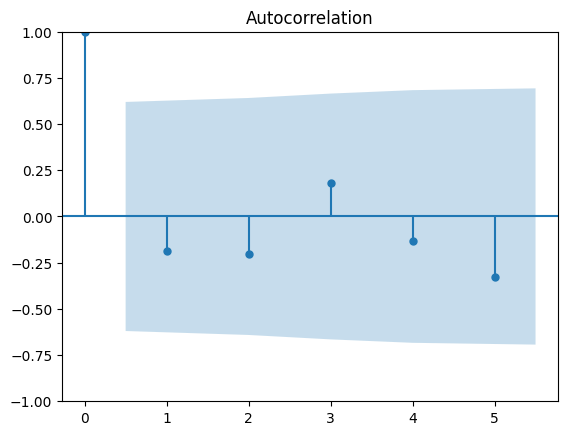

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series['t'])
plt.show()

# PACF PLOT

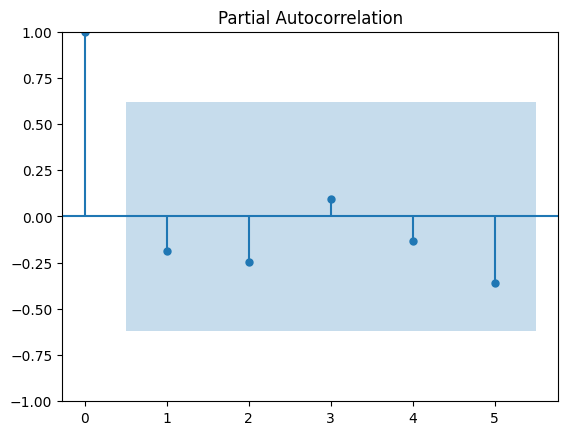

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series['t'], lags=5)
plt.show()

# ACF AND PACF

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
import matplotlib.pyplot as plt

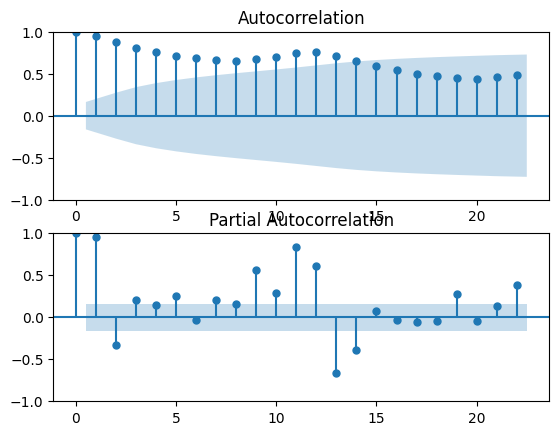

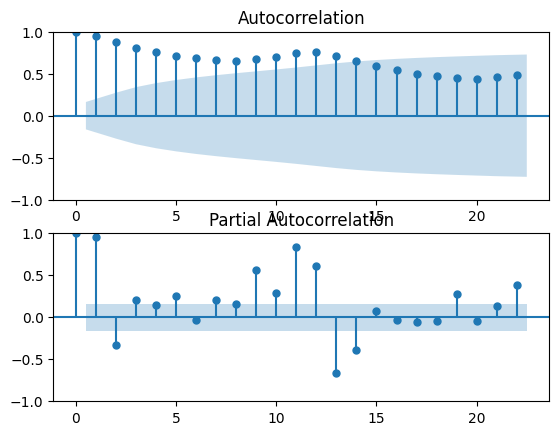

In [5]:
df = pd.read_csv("AirPassengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["value"]
y
fig, ax = plt.subplots(2, 1)
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method="ols")

In [6]:
acf(y, nlags=10)

acf_df = pd.DataFrame()
for lag in range(0, 11):
    acf_df[f"y_lag_{lag}"] = y.shift(lag)
acf_df
acf_df.corr()["y_lag_0"].values

array([1.        , 0.96019465, 0.89567531, 0.83739477, 0.7977347 ,
       0.78594315, 0.7839188 , 0.78459213, 0.79221505, 0.8278519 ,
       0.8827128 ])

In [7]:
# benchmark
acf(y, nlags=10)
# replicating the acf function
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(np.dot((y - mu).iloc[lag:], (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)
# alternative way to write the same using sum instead of the dot product
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(sum((y - mu).iloc[lag:] * (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [8]:
pacf(df, nlags=10, method="ols")
N_LAGS = 10
# the first partial autocorrelation is always equal to 1
pacf_list = [1]
X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]
for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k],y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])
np.array(pacf_list)

pacf(y, 2, method="ols-inefficient")
pacf(y, 4, method="ols-inefficient")

array([ 1.        ,  0.95860315, -0.33427195,  0.1970437 ,  0.13909745])

In [9]:
pacf(y, 2, method="ols")
pacf(y, 4, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798])